In [3]:
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [4]:
import pandas as pd
import numpy as np
import jieba
jieba.set_dictionary('dict.txt.big')

# 資料前處理

## 讀入爬蟲資料

In [5]:
KoreaDrama=pd.read_csv('KoreaDrama_re.csv') #開啟檔案

## 無意義字元列表，可以自行新增

In [ ]:
removeword = ['span','class','f3','https','imgur','h1','_   blank','href','rel',
              'nofollow','target','cdn','cgi','b4','jpg','hl','b1','f5','f4',
              'goo.gl','f2','email','map','f1','f6','__cf___','data','bbs'
              'html','cf','f0','b2','b3','b5','b6','原文內容','原文連結','作者'
              '標題','時間','看板','<','>','，','。','？','—','閒聊','・','/',
              ' ','=','\"','\n','」','「','！','[',']','：','‧','╦','╔','╗','║'
              ,'╠','╬','╬',':','╰','╩','╯','╭','╮','│','╪','─','《','》','_'
              ,'.','、','（','）','　','*','※','~','○','”','“','～','@','＋']

## 設定你關心的影劇名稱

In [ ]:
movie = ['成為王的男人','皇后的品格','赤月青日','神的測驗',
        '死之詠讚','王牌大律師','Priest驅魔者','加油吧威基基',
        '皮諾丘','魔女寶鑑','好運羅曼史','購物王路易','七次初吻',
        '男朋友','請回答1997','來自星星的你']

## 將我們關心的影劇名稱加入jieba的字典裡面

In [ ]:
for i in movie:
    jieba.add_word(i)

## 豆瓣上面的評分

In [ ]:
bean = [6.9, 7.5, 8.6, 7.8, 8.5, 9.3, 6.8, 8.6, 8.2, 5.9, 6.7, 7.2, 5.8, 7.0, 9.0, 8.3]
score_avg = np.mean(bean)

In [ ]:
KoreaDrama['標題與內容'] = KoreaDrama['標題'] +  KoreaDrama['內容']

## 移除無意義字元列

In [ ]:
'好棒棒'.replace('好', '')

In [ ]:
for word in removeword:
    KoreaDrama['標題與內容'] = KoreaDrama['標題與內容'].str.replace(word,'')

## 所有文章和標題都串在一起

In [ ]:
theSTR = KoreaDrama['標題與內容'].tolist() 


In [ ]:
theSTR = ''.join(theSTR ) # 「標題與內容」全部併在一起

In [ ]:
theSTR[0:1000]

## 切詞

In [ ]:
words = list(jieba.cut(theSTR))

In [ ]:
words[0:10]

## 問題：以影劇為單位，去計算每個影劇，在所有資料中的聲量

In [ ]:
# 問題：定義在list裡面找尋字詞的function
def search_word(word, word_list):
    save = []

    for i in word_list:
        if word in i:
            save.append(i)

    return save

In [ ]:
save = search_word(word = '來自星星的你', word_list = words)

In [ ]:
save

In [ ]:
# 問題：找出聲量
# hint：len
len(save)

In [ ]:
# 如何使用for迴圈，將movie裡面的字詞都在words（wordlist）找出來聲量
# 並且以mv_voice來存儲[ 影劇名稱, 聲量 ]
mv_voice = []
for i in movie:
    save = search_word(word = i, word_list = words)
    mv_voice.append([i, len(save) ])
    

In [ ]:
mv_voice

In [ ]:
# 問題：將mv_voice list轉換成DataFrame
# 並命名兩個欄位為「劇名」與「聲量」
mv_voice = pd.DataFrame( mv_voice )

In [ ]:
mv_voice

In [ ]:
mv_voice.columns =['劇名', '聲量']

In [ ]:
mv_voice

In [ ]:
# 問題：將豆瓣評分（bean）給放入mv_voice中，並新增一個欄位為「評分」
mv_voice['評分'] = bean

In [ ]:
mv_voice

## 計算聲量的平均

In [ ]:
avg=np.mean(mv_voice['聲量'])

In [ ]:
avg

# 基礎點陣圖與cp值清單

![](https://imgur.com/GbPK113.png)

## 繪圖

## 判斷四個象限所在的位置，來決定顏色

In [ ]:
mv_voice.head(3)

In [ ]:
mv_voice['評分'].iloc[0]

In [ ]:
len(mv_voice)

In [ ]:
axe_list = []
for i in range(len(mv_voice)):
    if mv_voice['評分'].iloc[i] > score_avg and mv_voice['聲量'].iloc[i] > avg:#1_第一象限
        color = 'blue'
        axe = '1_第一象限'
        
    elif mv_voice['評分'].iloc[i] >score_avg and mv_voice['聲量'].iloc[i]<= avg:#4_第四象限
        color = 'green'
        axe = '4_第四象限'
        
    elif mv_voice['評分'].iloc[i] <=score_avg and  mv_voice['聲量'].iloc[i]> avg:
        color = 'red'
        axe = '2_第二象限'
        
    else:#2_第二象限
        color = 'black'
        axe = '3_第三象限'
    # plt.scatter(bean[i],mv_voice[i], color=color)

    # voice_list.append(mv_voice[i])
    # bean_list.append(bean[i])
    axe_list.append(axe)

# plt.axhline(avg, color='c', linestyle='dashed', linewidth=1) # 繪製水平平均線 
# plt.axvline(score_avg, color='c', linestyle='dashed', linewidth=1) # 繪製垂直平均線  

# plt.title("scatter",fontsize=30)#標題
# plt.ylabel("frequency",fontsize=15)#y的標題
# plt.xlabel("ratings",fontsize=15) #x的標題
# plt.legend()
# plt.show()

## 製作清單

In [ ]:
axe_list

In [ ]:
# 問題：將axe_list加入到mv_voice裡面，增加欄位「象限」
mv_voice['象限'] = axe_list

In [ ]:
mv_voice

## 問題：將mv_voice根據「象限」由第一象限排序到第四象限

In [ ]:
mv_voice = mv_voice.sort_values('象限')

In [ ]:
mv_voice

## 問題：將mv_voice輸出csv
## 名稱：評分與聲量圖.csv

In [ ]:
mv_voice.to_csv('評分與聲量圖.csv', encoding='UTF-8-sig')

# 成本效益評估分析

![](https://imgur.com/RcPeewO.png)

## 我們可不可以加入每一則影劇的成本？
## 問題：請讀取drama_cost.csv，並存到drama_cost裡面

In [ ]:
drama_cost = pd.read_csv('drama_cost.csv', encoding='cp950') #encoding='cp950'

In [ ]:
drama_cost

In [ ]:
mv_voice

In [ ]:
# 問題：將drama_cost的cost欄位加入mv_voice，並將欄位取名為「成本」
# merge 等同於 excel裡面的vlookup
mv_voice = mv_voice.merge( drama_cost, on = '劇名', how = 'left' )

In [ ]:
mv_voice

In [ ]:
# 將cost欄位改成「成本」

mv_voice = mv_voice.rename( columns = { 'cost' :  '成本'  } )
mv_voice

## 計算drama_cost成本(cost)的平均（mean），作為X軸的分割線

In [ ]:
avg_cost = drama_cost['cost'].mean()

# fig = plt.figure(figsize=(15,10))
voice_list =[]
cost_list = []
axe_list = []
for i in range(len(drama_cost['cost'])):
    if mv_voice['成本'].iloc[i] > avg_cost and mv_voice['聲量'].iloc[i] >avg:#1_第一象限
        color = 'blue'
        axe = '1_第一象限'
        
    elif mv_voice['成本'].iloc[i] > avg_cost and mv_voice['聲量'].iloc[i] <= avg:#4_第四象限
        color = 'green'
        axe = '4_第四象限'
        
    elif mv_voice['成本'].iloc[i] <= avg_cost and mv_voice['聲量'].iloc[i] > avg:#3_第三象限
        color = 'red'
        axe = '2_第二象限'
        
    else:#2_第二象限
        color = 'black'
        axe = '3_第三象限'
        
    axe_list.append(axe)
    
    

## 製作清單

In [ ]:
# 問題：將axe_list加入到mv_voice裡面，增加欄位「成本效益象限」
mv_voice['成本效益象限'] = axe_list

In [ ]:
mv_voice

## 將mv_voice根據「象限」由第一現象排序到第四象限

In [ ]:
mv_voice = mv_voice.sort_values('成本效益象限')

In [ ]:
mv_voice

## 請將mv_voice輸出csv

In [ ]:
mv_voice.to_csv('成本效益評估分析.csv', encoding = 'utf-8-sig')

# 動態圖製作 - 成本效益評估分析

In [ ]:
import plotly.express as px

## 問題：
- x 為成本
-  y 為聲量（關注程度）
-  以成本效益象限當做顏色點的區分
-  size大小以成本區分

In [ ]:
mv_voice.head(2)

In [ ]:
# scatter: 散佈圖
fig = px.scatter(mv_voice,
                x = '成本',
                 y = '聲量',

                 # 點的大小
                 size = '成本',

                 # 點的顏色
                 color = '成本效益象限',

                 # 新增點的名稱
                 hover_data=['劇名'])

plot(fig, filename='成本效益評估分析1.html')

## 接下來，我們要將X軸與Y軸放入動態圖中！
## 我們會使用的是 update_layout

![](https://imgur.com/2b3ZR2u.png)
![](https://imgur.com/coC68XJ.png)
![](https://imgur.com/hkMyuhS.png)
![](https://imgur.com/pl6p20r.png)




In [ ]:

fig.update_layout(
        
        title = '成本效益評估分析',
        shapes=[
        
        # 設定X軸
        dict({
            'type': 'line',
            'x0': avg_cost,
            'y0': -10,
            
            'x1': avg_cost,
            'y1': mv_voice['聲量'].max()*1.1,

            }),
    
        # 設定Y軸
        dict({
            'type': 'line',
            'x0': 0,
            'y0': avg,
            
            'x1': mv_voice['成本'].max()*1.1,
            'y1': avg,
            
            })
    
    ])

plot(fig, filename='成本效益評估分析2.html')

# 情緒分析圖

![](https://imgur.com/JTjlRTt.png)

![](https://imgur.com/mU373B7.png)

## 我們可不可以加入正負面聲量？
## 目的：了解目前評論的正負聲量，作為買進的參考指標

In [ ]:
from Self_sentiment import Self_sentiment
sentiment = Self_sentiment()
sentiment.load('MultinomialNB') 

## 範例 

In [ ]:
content_self = '資料來源百百款，種類繁複，有些由人們所產生，有些則由機器所產生；有些資料存放在企業內部，極其珍貴，有些資料則屬於外部來源，讓資料科學家可以信手拈來。'

dist= sentiment.sentiment(content_self)

dist

# pos 正向
# neg 負向
# Range 從 0 ~ 1, 通常 pos >= 0.5 即是正向
dist.prob('pos')   

## 統計正負輿情 範例

In [ ]:
j = '來自星星的你'
star = KoreaDrama[KoreaDrama['標題與內容'].str.contains(j)]
star 


In [ ]:
dist= sentiment.sentiment(star['標題與內容'].iloc[0])
dist.prob('pos') 

# 2020/12/15 進度到此

## 計算不同韓劇的情緒分數

In [ ]:
from cp import calculate_sentiment_pos
mv_sent = calculate_sentiment_pos(KoreaDrama=KoreaDrama,
                        movie=movie,
                        col='標題與內容' )
mv_sent

mv_voice['情緒分數'] = mv_sent

mv_voice['評分'] = bean

## 將mv_voice根據「象限」由第一象限排序到第四象限

In [ ]:
mv_voice = mv_voice.sort_values('成本效益象限')

## 請將mv_voice輸出csv

In [ ]:
mv_voice.to_csv('成本效益與情緒評估分析.csv', encoding = 'utf-8-sig')

## 問題：將「動態圖製作 - 成本效益評估分析」中的
## size變成「情緒分數」
## title變成 「成本效益與情緒評估分析」

In [ ]:
import plotly.express as px

In [ ]:
fig = px.scatter(mv_voice, x="成本", y="聲量", 
                 color="成本效益象限",
                 size= '？？？？', hover_data=['劇名'], 
                 title = '？？？？')


fig.update_layout(
        
        shapes=[
        
        # 設定X軸
        dict({
            'type': 'line',
            'x0': avg_cost,
            'y0': -10,
            
            'x1': avg_cost,
            'y1': mv_voice['聲量'].max()*1.1,
            }),
    
        # 設定Y軸
        dict({
            'type': 'line',
            'x0': 0,
            'y0': avg,
            
            'x1': mv_voice['成本'].max()*1.1,
            'y1': avg,
           })
    
    ])

    
plot(fig, filename='成本效益與情緒評估分析.html')


# 綜整模組

In [6]:
import pandas as pd
import numpy as np
import jieba
jieba.set_dictionary('dict.txt.big')

## 無意義字元列表，可以自行新增

In [7]:
# 停止字stop word：專門為ptt的，如果抓有抓取不同論壇，如：dcard等，自己觀察官的停止字，並補充上去。
removeword = ['span','class','f3','https','imgur','h1','_   blank','href','rel',
              'nofollow','target','cdn','cgi','b4','jpg','hl','b1','f5','f4',
              'goo.gl','f2','email','map','f1','f6','__cf___','data','bbs'
              'html','cf','f0','b2','b3','b5','b6','原文內容','原文連結','作者'
              '標題','時間','看板','<','>','，','。','？','—','閒聊','・','/',
              ' ','=','\"','\n','」','「','！','[',']','：','‧','╦','╔','╗','║'
              ,'╠','╬','╬',':','╰','╩','╯','╭','╮','│','╪','─','《','》','_'
              ,'.','、','（','）','　','*','※','~','○','”','“','～','@','＋']

## 讀入爬蟲資料

In [10]:
# 請從過的資料 MDS_06-->03ppt_crawler-->爬取ppt爬取ppt版位
KoreaDrama=pd.read_csv('KoreaDrama_re.csv') #開啟檔案

## 設定你關心的影劇名稱

In [11]:
# 設定與想得知的「產品」
movie = ['成為王的男人','皇后的品格','赤月青日','神的測驗',
        '死之詠讚','王牌大律師','Priest驅魔者','加油吧威基基',
        '皮諾丘','魔女寶鑑','好運羅曼史','購物王路易','七次初吻',
        '男朋友','請回答1997','來自星星的你']

## 喜劇評分

In [12]:
# 自己設定的屬性(source:內、外部資料)
bean = [6.9, 7.5, 8.6, 7.8, 8.5, 9.3, 6.8, 8.6, 8.2, 5.9, 6.7, 7.2, 5.8, 7.0, 9.0, 8.3]

## 加入成本要素

In [14]:
# 自己設定的「內部資料」，通常或與x相關，例如：成本

drama_cost = pd.read_csv('drama_cost.csv', encoding ='cp950')

In [15]:
from cp import plt_cp_product

Building prefix dict from d:\學校\台科大\碩二上學期\(旁)行銷資料科學\20201229\01_產品價值分類模型與實戰\dict.txt.big ...
Dumping model to file cache C:\Users\user\AppData\Local\Temp\jieba.u8ebfd45f39c5f3b5d96fb0740ed57b4e.cache
Loading model cost 0.972 seconds.
Prefix dict has been built successfully.
load default bestMainFeatures
load default bestMainFeatures success!!
load model from MultinomialNB


## removeword:要刪除字詞
## movie : 我們的產品
## bean : 產品評分
## drama cost : 產品的成本
## KoreaDrama : 從ptt裡面爬下來的資料

No handles with labels found to put in legend.


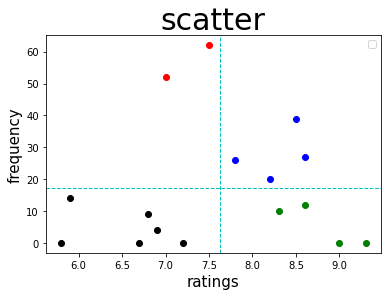

No handles with labels found to put in legend.


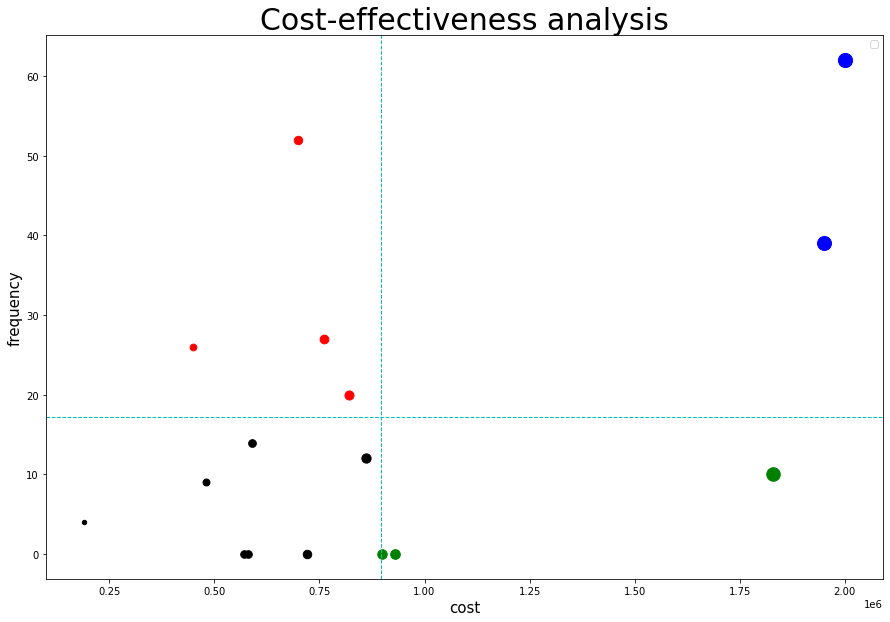

load default bestMainFeatures
load default bestMainFeatures success!!
load model from MultinomialNB
計算成為王的男人的情緒分析....
計算皇后的品格的情緒分析....
計算赤月青日的情緒分析....
計算神的測驗的情緒分析....
計算死之詠讚的情緒分析....
計算王牌大律師的情緒分析....
計算Priest驅魔者的情緒分析....
計算加油吧威基基的情緒分析....
計算皮諾丘的情緒分析....
計算魔女寶鑑的情緒分析....
計算好運羅曼史的情緒分析....
計算購物王路易的情緒分析....
計算七次初吻的情緒分析....
計算男朋友的情緒分析....
計算請回答1997的情緒分析....
計算來自星星的你的情緒分析....


In [16]:
final_list = plt_cp_product(removeword = removeword, 
                            movie = movie, 
                            bean = bean,
                            drama_cost = drama_cost , 
                            KoreaDrama = KoreaDrama)